### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : waves_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/waves_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,4.68,5.10,4.32,4.98,"6,194,560","467,862,000"
1,2017-09-04,5.20,5.21,4.24,4.66,"8,324,540","519,570,000"
2,2017-09-03,5.27,5.50,4.99,5.20,"5,174,780","526,827,000"
3,2017-09-02,5.78,5.87,5.07,5.23,"6,608,910","577,688,000"
4,2017-09-01,5.95,6.10,5.72,5.74,"9,556,080","595,498,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461 entries, 2017-09-05 to 2016-06-02
Data columns (total 6 columns):
Open          461 non-null float64
High          461 non-null float64
Low           461 non-null float64
Close         461 non-null float64
Volume        461 non-null object
Market Cap    461 non-null object
dtypes: float64(4), object(2)
memory usage: 25.2+ KB


- The data frame has 461 entries and 6 columns. 
- All columns has 461 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    19
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.
- There is null data in Market Cap

Solution:
- Convert to float number
- Using interpolation to fill the missing data

In [12]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'numpy.int64'>
Market Cap Data Type : <class 'numpy.float64'>


In [7]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461 entries, 2017-09-05 to 2016-06-02
Data columns (total 6 columns):
Open          461 non-null float64
High          461 non-null float64
Low           461 non-null float64
Close         461 non-null float64
Volume        461 non-null int64
Market Cap    442 non-null float64
dtypes: float64(5), int64(1)
memory usage: 25.2 KB


In [8]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,461.000000,461.000000,461.000000,461.000000,4.610000e+02,4.420000e+02
mean,1.230215,1.325607,1.139349,1.236654,1.029869e+06,1.239107e+08
std,1.736739,1.855163,1.612736,1.743821,1.865055e+06,1.772387e+08
min,0.127527,0.151516,0.122684,0.127242,4.912000e+03,1.275270e+07
25%,0.209567,0.218997,0.195051,0.209126,5.223200e+04,2.059290e+07
50%,0.263923,0.282579,0.245773,0.262370,1.543750e+05,2.517550e+07
75%,1.330000,1.600000,1.190000,1.370000,1.225380e+06,1.386978e+08
max,6.340000,7.010000,5.740000,6.340000,1.012410e+07,6.344690e+08


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [9]:
df1.isna().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    19
dtype: int64

In [10]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Market Cap'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-06-25,0.193498,0.243791,0.189895,0.201881,412951,19349800.0
2016-06-24,0.199983,0.218997,0.180431,0.195036,715427,19998300.0
2016-06-23,0.191379,0.205271,0.172964,0.199471,530030,19137900.0
2016-06-22,0.230252,0.234911,0.176512,0.188528,878411,23025200.0
2016-06-21,0.289209,0.292218,0.217718,0.230596,626728,28920900.0


In [11]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.996381,0.997007,0.994176,0.872792,1.000000
High,0.996381,1.000000,0.996415,0.997731,0.883921,0.996380
Low,0.997007,0.996415,1.000000,0.997374,0.875170,0.997012
Close,0.994176,0.997731,0.997374,1.000000,0.881557,0.994182
Volume,0.872792,0.883921,0.875170,0.881557,1.000000,0.872833
Market Cap,1.000000,0.996380,0.997012,0.994182,0.872833,1.000000


In the data frame above, we can inferred that Market Cap has a perfect relationship with Open

Let's plot data between Market Cap and other variable, then see the relation between the data

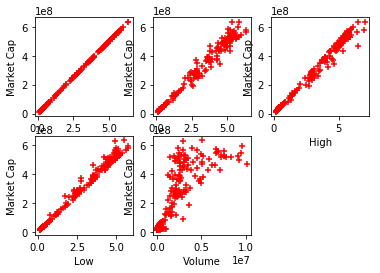

In [13]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(new_df.Open, new_df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(new_df.Close, new_df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(new_df.High, new_df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(new_df.Low, new_df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(new_df.Volume, new_df['Market Cap'],'Volume')

In [14]:
from sklearn import linear_model

model    = linear_model.LinearRegression()
x        = new_df[['Open']]
y        = new_df['Market Cap']

In [15]:
# train data using linear regression 
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Model Score
model.score(x, y)

0.9999992512939394

In [17]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
x = df1[['Open']]
y = model.predict(x) 
df1['Market Cap Predict'] = y.astype('int64')
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
Date,,,,,,,
2016-06-20,0.604243,0.604243,0.227050,0.289737,1771960,NaN,60426903
2016-06-19,0.665885,0.745494,0.456124,0.603760,112349,NaN,66591710
2016-06-18,0.898507,1.100000,0.309397,0.665480,173575,NaN,89856199
2016-06-17,0.930645,1.000000,0.787590,0.899224,42058,NaN,93070315
2016-06-16,0.956326,1.180000,0.927815,0.928007,43879,NaN,95638668


#### 4. Data Visualization

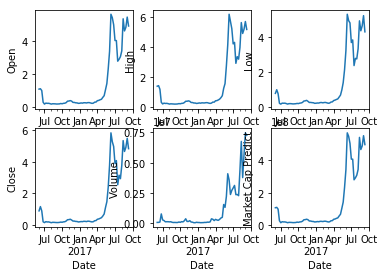

In [18]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1['Volume'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df1['Market Cap Predict'].resample('W').mean().plot()